In [1]:
from data.dataset import MyDataset

dataset = MyDataset("ml-1m")
print("Succesfully read data!")
dataset.trainTestValidationSplit()
print("Performed data split!")



CUDA available! Setting default tensor type to cuda.FloatTensor
The links parameter aren't initialized!
Succesfully read data!
Performed data split!


In [2]:
from recommender.model.RBM import RBM
from pprint import pprint
bs = 100

rbm = RBM(
    n_visible=dataset.nItems,
    ratings=5,
    verbose=True,
    device="cuda",
    n_hidden=100,
    batch_size=bs,
    learning_rate=1e-3,
    early_stopping=True,
    max_epoch=1000,
    patience=10,
    l1=0.9,
    l2=1e-5,
    momentum=0.5
)

rbm.save_model_to_file("untrainedRBM.pt")


In [3]:
rbm.fit(dataset)
rbm.fit(dataset, t=5)
rbm.fit(dataset, t=7)
rbm.fit(dataset, t=11)
rbm.fit(dataset, t=15)

#####	--------------------	TRAIN				VALIDATION
Epoch	--------------------	RMSE		MAE		RMSE		MAE
0	################	1.410450	0.899656	1.520066	1.098442	
1	################	1.234773	0.760722	1.323877	0.923212	
2	################	1.165716	0.706734	1.252398	0.867388	
3	################	1.131459	0.679633	1.213368	0.834528	
4	################	1.129708	0.680178	1.181577	0.811161	
5	################	1.106031	0.661577	1.165311	0.800663	
6	################	1.095424	0.655626	1.150471	0.789845	
7	################	1.078557	0.641470	1.121217	0.763599	
8	################	1.082878	0.643820	1.129421	0.772876	
9	################	1.075750	0.639759	1.111656	0.759598	
10	################	1.074114	0.638024	1.104044	0.754445	
11	################	1.067485	0.632619	1.097035	0.748551	
12	################	1.063452	0.630100	1.094240	0.744486	
13	################	1.074637	0.637725	1.103692	0.752656	
14	################	1.065656	0.632893	1.108815	0.755141	
15	################	1.063163	0.627556	1.088151	0.739904	
16	

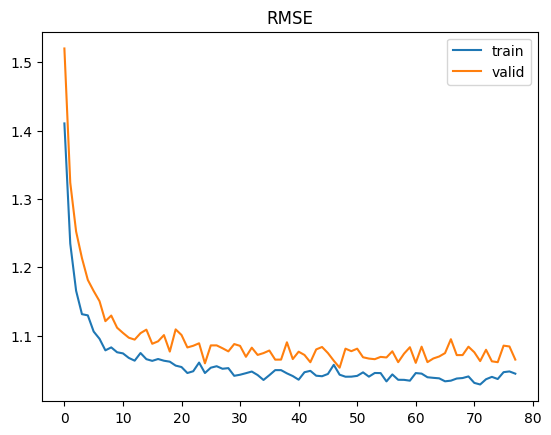

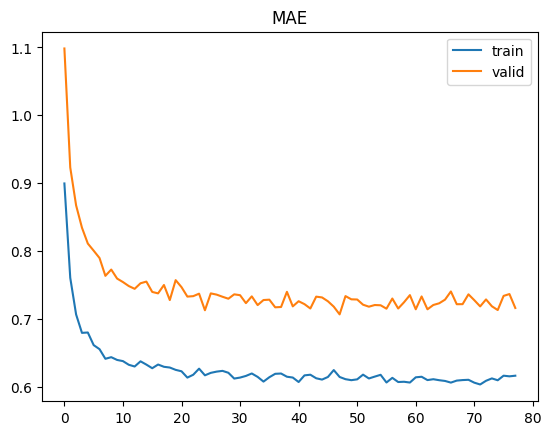

In [4]:
import matplotlib.pyplot as plt

plt.title("RMSE")
plt.plot(rbm.metrics.trainRMSE)
plt.plot(rbm.metrics.validRMSE)
plt.legend(['train','valid'])
plt.show()

plt.title("MAE")
plt.plot(rbm.metrics.trainMAE)
plt.plot(rbm.metrics.validMAE)
plt.legend(['train','valid'])
plt.show()

In [5]:
rbm.metrics.bestRMSE

{'epoch': 47, 'value': 1.0532040642363252}

In [6]:
rbm.metrics.bestMAE

{'epoch': 47, 'value': 0.7068459057483044}

In [18]:
import math
testing_model = RBM(0)
testing_model.load_model_from_file("rbm1673677020.758468.pt", device="cuda")

se = ae = n = 0
for batch in dataset.batches(dataset.testData, 64):
    _se, _ae = testing_model.batch_error(batch)
    se += _se
    ae += _ae
    n += 1
    
print(math.sqrt(se/n), ae/n)

1.0309813574570268 0.7042006798586453
